In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
df = pd.read_csv('Boston.csv')

def extract_samples(gender,year):
    return df[(df["YEAR"]==year)&(df["GENDER"]==gender)]["TIMES"].values

def extract_top_samples(gender,year):
    return sorted(df[(df["TIMES"]>7200)&(df["YEAR"]==year)&(df["GENDER"]==gender)]["TIMES"].values)[:100]

In [3]:
samples = extract_samples("M",2006)

# Variable Continua
Una variable continua es aquella que puede tomar un número infinito de valores.

## Distribución normal
La distribución normal o Gaussiana es la distribución continua que se utiliza más comúnmente en estadística porque muchas variables continuas comunes en el mundo tienen distribuciones que se asemejan estrechamente a la distribución normal.

La distribución normal sirve para acercarse a diversas distribuciones de probabilidad discreta, como la distribución binomial y la distribución de Poisson.

La distribución normal proporciona la base para la estadística inferencial clásica por su relación con el teorema de límite central.

En la distribución normal, uno puede calcular la probabilidad de que varios valores ocurran dentro de ciertos rangos o intervalos. Sin embargo, la probabilidad exacta de un valor particular dentro de una distribución continua, como la distribución normal, es cero. 

__Función de densidad__:

\begin{aligned}\phi _{\mu ,\sigma ^{2}}(x)&{}={\frac {1}{\sigma {\sqrt {2\pi }}}}e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}},\quad x\in \mathbb {R} .\\\end{aligned}


__Función de distribución__ normal estándar es un caso especial de la función donde $\mu =0$ y $\sigma =1$

\begin{aligned}{\displaystyle \Phi (x)=\Phi _{0,1}(x)={\frac {1}{\sqrt {2\pi }}}\int _{-\infty }^{x}e^{-{\frac {u^{2}}{2}}}\,du,\quad x\in \mathbb {R} .} \\\end{aligned}


In [4]:
m = samples.mean()
s = samples.std()
from scipy import stats
mivar_continua =stats.norm(m,s)
#P(x<=1500)
mivar_continua.cdf(1500)

6.409188597577314e-08

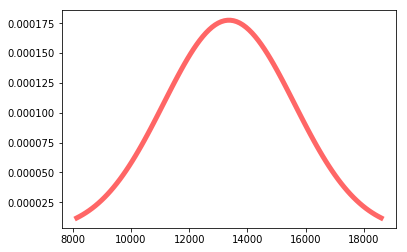

In [5]:
# Plot the random variable pmf
x = np.linspace(mivar_continua.ppf(0.01),mivar_continua.ppf(0.99), 100)
#plt.hist(samples, bins=100);
plt.plot(x, mivar_continua.pdf(x),'r-', lw=5, alpha=0.6, label='norm pdf');

In [6]:
x = np.arange(5128,28152)
#prob_samples = list(map(lambda e: mibinom.pmf(e),x ))
prob_samples = list(map(lambda e: len(samples[(samples==e)])/12088,x))

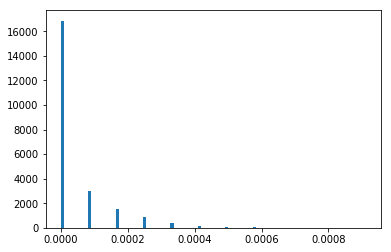

In [7]:
plt.hist(prob_samples, bins=100);

In [8]:
Z =stats.norm(0,1)

In [9]:
#P(X<0.124)
Z.cdf(.124)

0.549342362468261

In [10]:
#P(Z>-0,86)
1- Z.cdf(-0.86)


0.8051054787481916

In [11]:
#P(-1.35<Z<0.44)
Z.cdf(0.44) - Z.cdf(-1.35)

0.5815234549020044

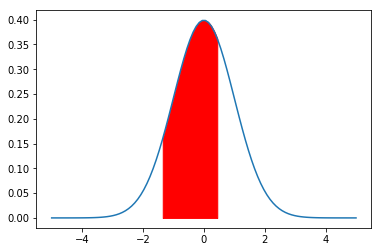

In [12]:
x = np.linspace(-5,5,100)
y = list(map(Z.pdf,x))
plt.plot(x,y)
#P(-1.35<Z<0.44)
x2 = np.linspace(-1.35,0.44,100)
y2 = list(map(Z.pdf,x2))
plt.fill_between (x2,y1=0,y2=y2, color="red");

In [13]:
from sympy import *
init_printing()
mu = Symbol("mu")
s = Symbol("sigma")
x = Symbol("x")
g = exp((x-mu)**2/(2*pi*s**2))/( sqrt(2*pi*s**2))

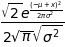

In [14]:
g

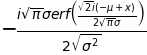

In [15]:
integrate(g,x)

In [16]:
#limit (y,x,oo)
limit (x,x,oo)

In [17]:
solve(integrate(g,x),0,90)

# Otras distribuciones
<img src="C6 - Variable Continua.png">


## Distribución Uniforme

A worker can arrive to the workplace at any moment between 6 and 7 in the morning with the same likelihood.

Compute and plot the probability density function of the variable that measures the arrival time.

Compute and plot the distribution function.

Compute the probability of arriving before quarter past six and after half past six.

What is the expected arrival time?

In [18]:
llegar = stats.uniform(loc=6,scale=1)

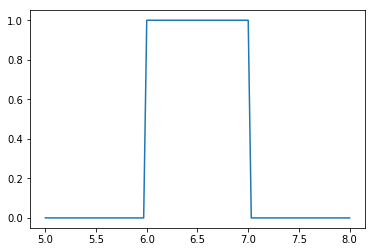

In [19]:
x = np.linspace(5,8,100)
y = list(map(llegar.pdf,x))
plt.plot(x,y);


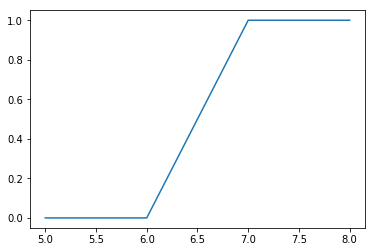

In [20]:
x = np.linspace(5,8,100)
y = list(map(llegar.cdf,x))
plt.plot(x,y);

In [21]:
1-llegar.cdf(6.5)+llegar.cdf(6.25)

In [22]:
llegar.mean()

## Distribución exponencial

Se ha comprobado que el tiempo de vida de cierto tipo 
de marcapasos sigue una distribución exponencial con media de 16 años.

1. ¿Cuál es la probabilidad de que a una persona a la que se le ha
implantado este marcapasos se le tenga que implantar otro antes de 20 años?

2. Si el marcapasos lleva funcionando correctamente 5 años en un paciente,
¿cuál es la probabilidad de que haya que cambiarlo antes de 25 años?

In [23]:
marca = stats.expon(scale=16)

In [24]:
marca.cdf(20)

In [25]:
#P[x<30 | X>5] = P[x<30 y x>5] / P[x>5] = P[5<x<30] / P[x>5] 

marca.cdf(30)- marca.cdf(5) / marca.cdf(5)

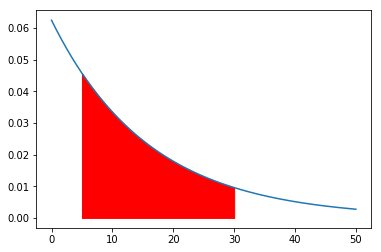

In [26]:
x = np.linspace(0,50,1000)
y = list(map(marca.pdf,x))
plt.plot(x,y);

x2 = np.linspace(5,30,1000)
y2 = list(map(marca.pdf,x2))
plt.fill_between(x2, y1=0,y2=y2, color="red")

## Distribución Multivariante_normal

In [2]:
from scipy.stats import multivariate_normal
import numpy as np

In [3]:
x = np.linspace(0, 5, 10, endpoint=False)
y = multivariate_normal.pdf(x, mean=2.5, cov=0.5); 
y

array([0.00108914, 0.01033349, 0.05946514, 0.20755375, 0.43939129,
       0.56418958, 0.43939129, 0.20755375, 0.05946514, 0.01033349])

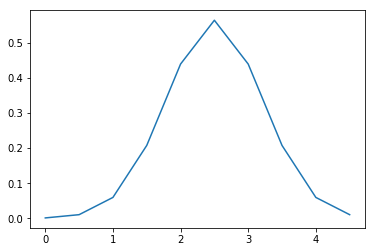

In [4]:
plt.plot(x, y)

Dos variables

In [28]:
mean = np.array([0,0])
cov = np.array([[1, 0], [0, 1]])
x =  np.array([np.arange(1,100,1),np.arange(1,100,1)])
x = x.reshape(99,2)
f = multivariate_normal.pdf(x, mean=mean, cov=cov)
F = multivariate_normal.cdf(x, mean=mean, cov=cov)